In [1]:
import pandas as pd
dmnd_df = pd.read_pickle("/home/hermuba/data0118/ecoli70_dmnd_df")

In [2]:
dmnd_df.shape # all of them # only the ones with blastp nr hits; the total size of pangenome is 31749

(30745, 7)

awk '/^>/{a++}END{print a}' Escherichia0.70
31749

pangenome size = 31749

In [3]:
len(dmnd_df['qseqid'].unique()) # they are not unique

30740

In [4]:
dmnd_df.loc[dmnd_df.duplicated(subset = 'qseqid')]
# some has duplicated hits;

,qseqid,sseqid,evalue,bitscore,staxids,stitle,sseq
10711,562.22478.con.0010_4|562.22478,EFP71293.1,3.100000e-10,76.3,622;754093;1401259;1401327,EFP71293.1 protein TolA [Shigella dysenteriae ...,MSKAIEQNDKLKRAIIISAVLHVILFAALIWSSFDENIEA
20837,562.22696.con.0027_5|562.22696,WP_096002614.1,2.400000e-33,151.4,562,WP_096002614.1 two-component system sensor his...,LEAGDNRTFHQCIHRIHGAANILNLQKLINISHQLEITPVSDDSKP...
20927,562.23330.con.0047_28|562.23330,WP_001064247.1,9.200000e-54,219.9,287;543;562;624;405955;656402;656423;981367;12...,WP_001064247.1 MULTISPECIES: type IV secretion...,YPDQFLPLQRDMIGKFGAAKDQWFSSFLLQVENHSSWHRLFVDPLS...
29701,562.22917.con.0034_22|562.22917,WP_054623864.1,6.300000e-25,123.2,28141,WP_054623864.1 type II toxin-antitoxin system ...,IRRRHWLRQGELAGLSAAQVNDMIDALTASAPAVIARVADALPVDF...
30743,JAPI01000011_22|1328444.3,WP_015344956.1,1.800000e-10,77.4,543;562;573,WP_015344956.1 MULTISPECIES: hypothetical prot...,MGGFPHGTGARQGGRIPTRHRRPARWADSHTAPAPG


In [5]:
dmnd_df.head()

,qseqid,sseqid,evalue,bitscore,staxids,stitle,sseq
0,JMUY01000001_1|1438670.3,ERO89779.1,2.900000e-13,82.8,562;1269001;1328433;1328435;1438668;1438670;14...,ERO89779.1 hypothetical protein L411_01206 [Es...,MVLAIFQLVPKMSMHLHSDKQVILLMVIHPLDGIGIVVHITP
1,JMUY01000001_3|1438670.3,WP_000972134.1,1.900000e-95,357.8,543;562;573;299766;941280;941322;1033813;11826...,WP_000972134.1 MULTISPECIES: tail fiber assemb...,MMHLKNITAGNPKTKEQYQLTKQFNIKWLYSADGKNWYEEQKNFQP...
2,JMUY01000001_5|1438670.3,WP_032140708.1,0.000000e+00,1243.8,562;941280;1328433;1438668;1438670;1438671;143...,WP_032140708.1 phage tail protein [Escherichia...,MSTTTRKFKTVITDTGAKKLAQAAAPDGKPVRLTHMAVGDGGGTLP...
3,JMUY01000001_8|1438670.3,WP_000213444.1,3.600000e-58,233.4,543;562;573;165302;656403;656447;670897;868133...,WP_000213444.1 MULTISPECIES: baseplate assembl...,MTTRYTGMNPDGTGNLNDMEHLKQSVRDILITPLASRVMRREYGSL...
4,JMUY01000001_10|1438670.3,EHX98065.1,5.900000e-115,422.9,562;868206;868209;868210;941280;941322;1182656...,EHX98065.1 phage virion morphogenesis protein ...,MKAMDKAFTRVDETFEAIRDSLNQQAINNIARKLAQDLRRAQQARI...


# We want to know 'staxid'.
- purpose: to find the target genomes sets for hypothetical gene inference by co-inheritance
- steps:
1. find out hypothetical
2. join their staxid

In [6]:
hypo = dmnd_df.loc[dmnd_df['stitle'].str.contains('hypothetical') | dmnd_df['stitle'].str.contains('ncharacter') | dmnd_df['stitle'].str.contains('unknown')]
hypo.shape

(14242, 7)

In [7]:
hypo.head()

,qseqid,sseqid,evalue,bitscore,staxids,stitle,sseq
0,JMUY01000001_1|1438670.3,ERO89779.1,2.900000e-13,82.8,562;1269001;1328433;1328435;1438668;1438670;14...,ERO89779.1 hypothetical protein L411_01206 [Es...,MVLAIFQLVPKMSMHLHSDKQVILLMVIHPLDGIGIVVHITP
11,JMUY01000001_23|1438670.3,WP_000236495.1,8.000000e-94,352.4,543;562;573;595;28901;299766;868155;868159;869...,WP_000236495.1 MULTISPECIES: hypothetical prot...,MVINYKQLREKREQVKESFRRNEDLTPLVRLAQGIVDAYEISLELP...
13,JMUY01000001_25|1438670.3,WP_000193205.1,8.200000e-149,535.8,543;562;573;90370;868194;869679;941280;941322;...,WP_000193205.1 MULTISPECIES: hypothetical prot...,MTQNPFSFYDFLGYLIPGGLFLFILFLFSIEINPVYIEGILNHILK...
16,JMUY01000001_29|1438670.3,WP_022645046.1,3.600000e-61,243.4,562;1328433;1328435;1328446;1328447;1438668;14...,WP_022645046.1 hypothetical protein [Escherich...,MILANDFLEYLLNTERDLAARVRDLYDMYLKSLPVPQLADGKIVID...
17,JMUY01000001_30|1438670.3,WP_000013455.1,2.500000e-31,143.7,543;562;573;299766;670890;868191;868194;869679...,WP_000013455.1 MULTISPECIES: hypothetical prot...,MANRKQHRAIAERRHIQTEINRRLSRASRVAQIMHINMLHERSHAL...


In [8]:
import numpy as np
def parse_taxis(string):
    return(string.split(';'))
def extract_taxid_set(df):
    ultimate_set = pd.Series()
    for i in df.index:
        if type(df.loc[i, 'staxids']) == str:
            taxid_set = parse_taxis(df.loc[i, 'staxids'])
            for tax in taxid_set:
                if tax in ultimate_set.index:
                    ultimate_set[tax] = ultimate_set[tax] + 1
                else:
                    ultimate_set[tax] = 1
    return(ultimate_set)
def longest_taxid_set(df):
    ultimate_set = pd.Series()
    for i in df.index:
        if type(df.loc[i, 'staxids']) == str:
            taxid_set = parse_taxis(df.loc[i, 'staxids'])
            
            # return the longest taxid
            length = np.array([len(t) for t in taxid_set])
            tax = taxid_set[np.argmax(length)]
            
            
            if tax in ultimate_set.index:
                ultimate_set[tax] = ultimate_set[tax] + 1
            else:
                ultimate_set[tax] = 1
    return(ultimate_set)

In [9]:
specific_s = longest_taxid_set(hypo)

In [10]:
specific_s.sort_values(ascending = False) # changed a lot

562        2494
543         260
1134687     156
1033813     143
573         128
1203544     104
624         102
1177180     100
1001991      98
561          88
1010817      78
1280986      71
1001989      63
1169336      62
550          61
1169338      61
1169327      61
1001988      59
1169317      59
1069495      58
1169364      56
1169339      56
28901        55
1127356      55
72407        54
1181777      54
1181732      52
1038927      50
1169330      49
1169315      46
           ... 
1281022       1
170623        1
1165942       1
1310592       1
470934        1
1288347       1
1379688       1
1028307       1
667127        1
1409963       1
710974        1
1609975       1
1124925       1
1438676       1
1116101       1
1124953       1
754093        1
1381121       1
1331198       1
58712         1
1005561       1
1316582       1
1438783       1
1379689       1
1281255       1
1328385       1
1281163       1
1400167       1
1400173       1
1328444       1
Length: 1884, dtype: int

In [11]:
s= extract_taxid_set(hypo) # each taxid and the times of appearance

In [12]:
s.sort_values(ascending = False)

562        10609
543         3053
573         2138
624         1677
550         1174
72407        901
571          818
546          703
28901        656
561          554
90371        547
59201        529
621          528
91347        527
301102       436
1463165      433
299766       417
548          410
90370        368
158836       355
208224       354
1328435      344
1328433      343
623          340
1438670      338
1438668      337
1438672      331
1328446      330
1328447      330
941322       316
           ...  
1183155        1
575564         1
558688         1
106648         1
2033511        1
1813773        1
1934252        1
1454644        1
1454640        1
1454630        1
204042         1
1242093        1
81409          1
477184         1
1324339        1
1324340        1
120164         1
1446701        1
1387331        1
569            1
1387345        1
1387333        1
488142         1
296            1
1387339        1
108980         1
707232         1
981327        

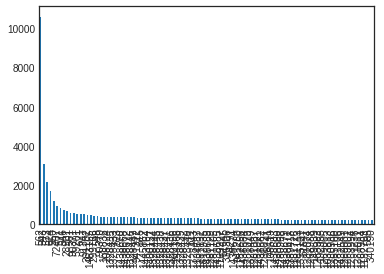

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
s.sort_values(ascending = False)[:100].plot(kind = 'bar')

In [14]:
with open("/home/hermuba/data0118/hypothetical_dmnd_hit_taxa", 'a') as f:
    for i in s.sort_values(ascending = False).index:
        f.write(i+'\n')

In [15]:
taxon_df = pd.DataFrame(index = s.index, columns = ['kingdom', 'phylum', 'class', 'order', 'family','genus', 'species','strain'])

In [16]:
# find the taxonomy naming 
taxon_list = '/nas/ncbi_download/taxon.list'

with open(taxon_list) as f:
    for line in f:
        taxid = line.split('\t')[0]
        if taxid in taxon_df.index:
            line.replace('\n', '')
            tx = line.split('\t')[1:]
            if len(tx) < 8:
                tx.append(['']*(8-len(tx)))
                
            taxon_df.loc[taxid] = tx
            

In [17]:
taxon_df['count'] = s

In [18]:
taxon_df['specific count'] = specific_s

In [19]:

taxon_df.to_pickle('/home/hermuba/data0118/hypothetical_taxon')

We have a lot of Enterobacteriae, Acinetobacter in our hypothetical....
refer to ~data0118/taxa_report.txt for full report

In [20]:
taxon_df.head()

,kingdom,phylum,class,order,family,genus,species,strain,count,specific count
562,Bacteria,Proteobacteria,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Escherichia,Escherichia coli,Escherichia coli\n,10609,2494.0
1269001,Bacteria,Proteobacteria,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Escherichia,Escherichia coli,Escherichia coli 908624\n,197,2.0
1328433,Bacteria,Proteobacteria,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Escherichia,Escherichia coli,Escherichia coli BWH 34\n,343,39.0
1328435,Bacteria,Proteobacteria,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Escherichia,Escherichia coli,Escherichia coli BWH 24\n,344,NaN
1438668,Bacteria,Proteobacteria,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Escherichia,Escherichia coli,Escherichia coli BIDMC 58\n,337,1.0


In [21]:
taxon_df.groupby(by = 'phylum')['count'].sum()

phylum
                     699
Actinobacteria        19
Apicomplexa            1
Arthropoda             1
Ascomycota             1
Chlamydiae             5
Chlorophyta            1
Chordata               2
Cnidaria               1
Firmicutes           198
Proteobacteria    234985
Name: count, dtype: int64

In [22]:
taxon_df.groupby(by = 'class')['count'].sum()

class
                          809
Aconoidasida                1
Actinobacteria             19
Alphaproteobacteria        23
Bacilli                   196
Betaproteobacteria        299
Chlamydiia                  5
Chlorophyceae               1
Clostridia                  2
Deltaproteobacteria         1
Eurotiomycetes              1
Gammaproteobacteria    234552
Insecta                     1
Mammalia                    2
Myxozoa                     1
Name: count, dtype: int64

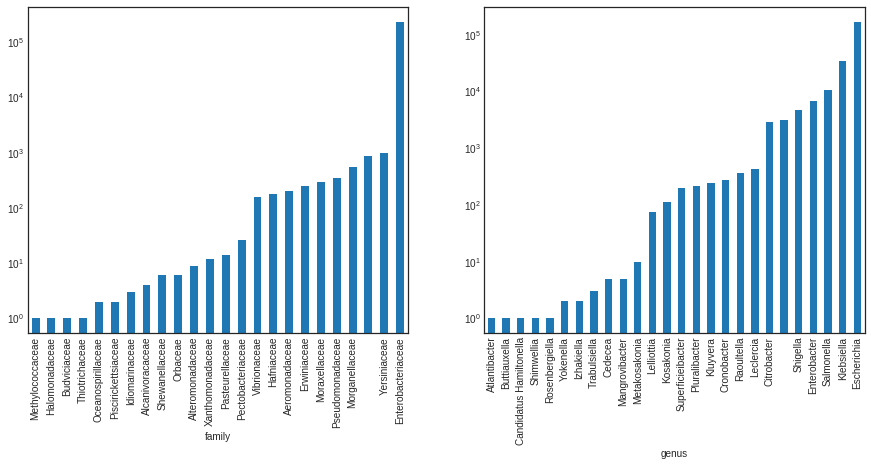

In [34]:

taxon_df.loc[taxon_df['class'] == 'Gammaproteobacteria'].groupby(by = 'family')['count'].sum().sort_values().plot(kind = 'bar', logy = True, )
taxon_df.loc[taxon_df['family'] == 'Enterobacteriaceae'].groupby(by = 'genus')['count'].sum().sort_values().plot(kind = 'bar', logy = True, ax=axes[1])

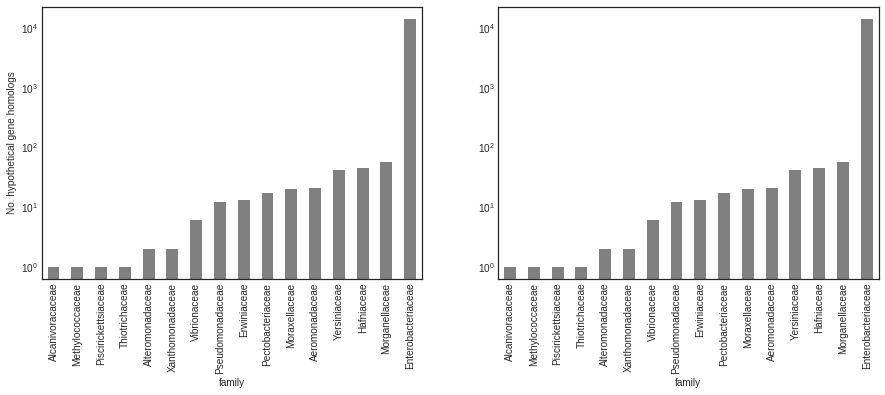

In [39]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (15,5))

family_count = taxon_df.loc[taxon_df['class'] == 'Gammaproteobacteria'].groupby(by = 'family')['specific count'].sum()
family_count = family_count.loc[family_count.index != ''].loc[family_count > 0]
family_count.sort_values().plot(kind = 'bar', logy = True, ax=axes[0], color = 'grey')
axes[0].set_ylabel('No. hypothetical gene homologs')

genus_count = taxon_df.loc[taxon_df['family'] == 'Enterobacteriaceae'].groupby(by = 'genus')['specific count'].sum()
genus_count = family_count.loc[family_count.index != ''].loc[family_count > 0]
family_count.sort_values().plot(kind = 'bar', logy = True, ax=axes[1], color = 'grey')

plt.savefig('/home/hermuba/data0118/fig/hypo_taxa.pdf', dpi = 300, format = 'pdf', bbox_inches='tight')

Text(0, 0.5, 'No. hypothetical genes')

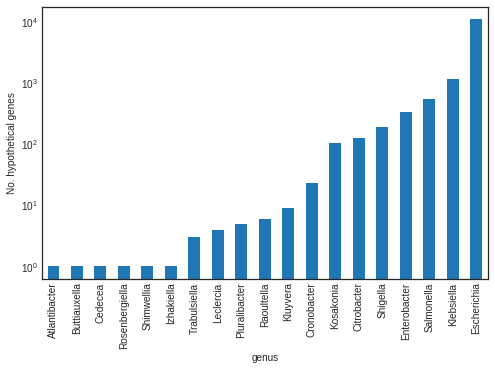

In [27]:

ax.set_ylabel('No. hypothetical genes')